In [23]:
# First cell - Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
titanic = pd.read_csv('C:\\Titanic\\Titanic-Dataset.csv')

#  Question 1
***
***According to Wikipedia, there was an estimated 2,224 passengers and crew onboard 
the Titanic when it sank. How many of them do we have information for in this dataset? 
Of the people we have data for, how many of them survived and how many did not? 
What is the overall survival rate?***
***

<details>

<summary><strong>Solution</strong> (show)</summary>

```python
total_passengers = len(titanic)
survival_counts = titanic['Survived'].value_counts()
survival_percentages = (survival_counts / total_passengers * 100).round(2)

print(f"Total passengers in dataset: {total_passengers}")
print("\nSurvival counts:")
print(survival_counts)
print("\nSurvival percentages:")
print(survival_percentages)

plt.figure(figsize=(8, 4))
sns.barplot(x=survival_counts.index.map({0:'No', 1:'Yes'}), y=survival_counts.values)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
for i, v in enumerate(survival_counts):
    plt.text(i, v/2, f"{survival_percentages[i]}%", ha='center')
plt.show()
</details>

```

In [ ]:
# Load the Titanic dataset to analyze (assuming it is provided as 'file.csv')
file_path = ('C:\\Titanic\\Titanic-Dataset.csv')
titanic_data = pd.read_csv(file_path)
# Inspect the dataset structure to understand the columns available
titanic_data.head(), titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [7]:
# Total number of passengers and crew in the dataset
total_passengers = len(titanic_data)
# Count of survivors and non-survivors
survivors_count = titanic_data['Survived'].sum()  # Assuming 'Survived' column has 1 for survived and 0 for not
non_survivors_count = total_passengers - survivors_count
# Calculate overall survival rate
survival_rate = (survivors_count / total_passengers) * 100
# Print the results
print(f"Total number of passengers and crew in the dataset: {total_passengers}")
print(f"Number of survivors: {survivors_count}")
print(f"Number of non-survivors: {non_survivors_count}")
print(f"Overall survival rate: {survival_rate:.2f}%")


Total number of passengers and crew in the dataset: 891
Number of survivors: 342
Number of non-survivors: 549
Overall survival rate: 38.38%


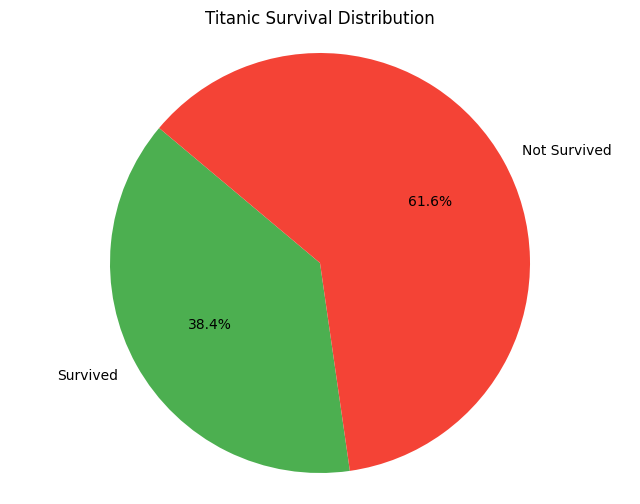

In [9]:
# Visualization
labels = ['Survived', 'Not Survived']
sizes = [survivors_count, non_survivors_count ]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Titanic Survival Distribution')
plt.show()

# Question 2
***
***How many passengers on the Titanic were males and how many were females? 
What do you find when you break it down by ticket class?***
***

In [11]:
# Data
data = {
    'Class': ['First', 'First', 'Second', 'Second', 'Third', 'Third'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Total': [171, 141, 155, 92, 450, 179],
    'Survived': [54, 113, 13, 79, 59, 88]
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

print(df)

    Class  Gender  Total  Survived
0   First    Male    171        54
1   First  Female    141       113
2  Second    Male    155        13
3  Second  Female     92        79
4   Third    Male    450        59
5   Third  Female    179        88


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
sex_counts = titanic['Sex'].value_counts()
sex_class_counts = pd.crosstab(titanic['Sex'], titanic['Pclass'])

print("\nSex distribution:")
print(sex_counts)
print("\nSex distribution by class:")
print(sex_class_counts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=titanic, x='Sex', ax=ax1)
ax1.set_title('Sex Distribution')

sns.countplot(data=titanic, x='Sex', hue='Pclass', ax=ax2)
ax2.set_title('Sex Distribution by Class')
plt.show()

</details>

```

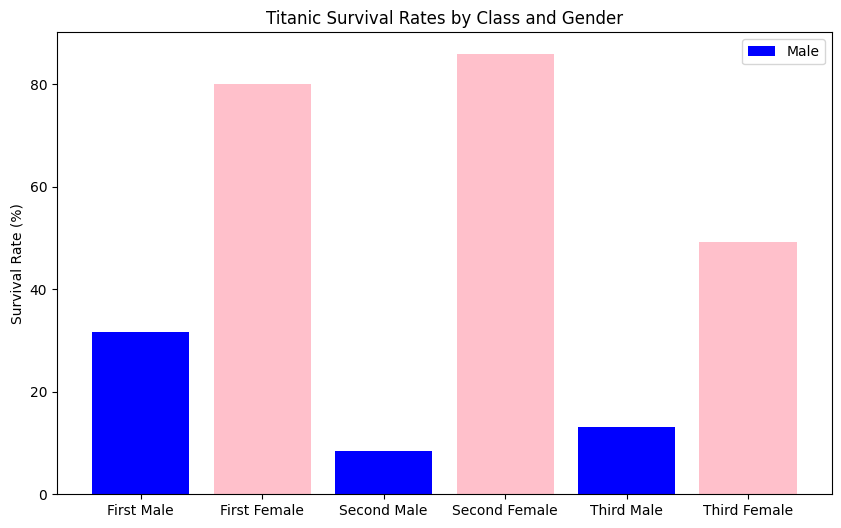

In [13]:

# Calculate survival rates
df['Survival Rate'] = (df['Survived'] / df['Total']) * 100

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df.index, df['Survival Rate'], color=['blue' if gender == 'Male' else 'pink' for gender in df['Gender']])
ax.set_xticks(df.index)
ax.set_xticklabels([f"{cls} {gender}" for cls, gender in zip(df['Class'], df['Gender'])])
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Titanic Survival Rates by Class and Gender')
ax.legend(['Male', 'Female'], loc='upper right')

plt.show()

# Question 3
***
***How many passengers of each sex survived and how many of them did not? 
What is the survival rate for passengers of each sex?***
***

In [17]:
# Load the Titanic dataset
data = pd.read_csv('C:\\Titanic\\Titanic-Dataset.csv')

# Calculate survival counts by sex
survival_counts = data.groupby('Sex')['Survived'].value_counts().unstack()
print(survival_counts)

# Calculate survival rates
survival_rates = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100
print(survival_rates)

Survived    0    1
Sex               
female     81  233
male      468  109
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


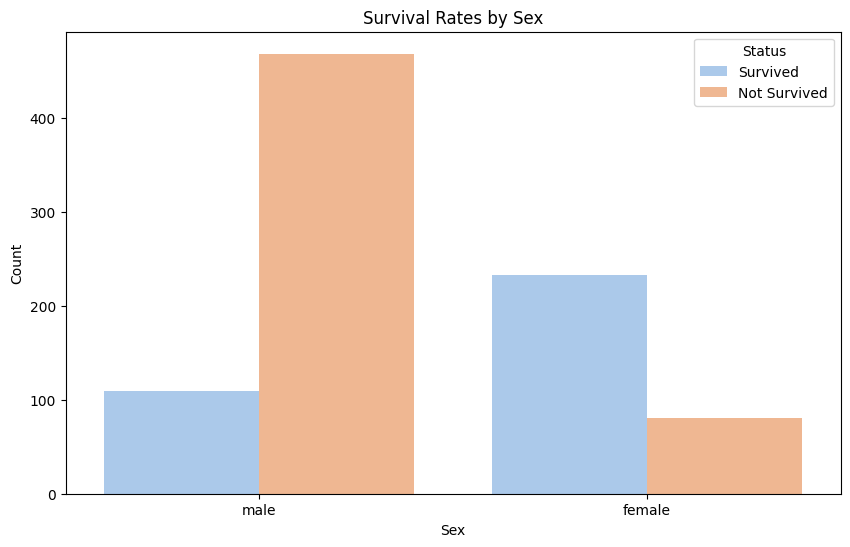

In [19]:
data = {
    'Sex': ['male', 'female'],
    'Survived': [109, 233],
    'Not Survived': [468, 81]
}

survival_rates = pd.DataFrame(data)

melted_data = survival_rates.melt(id_vars='Sex', value_vars=['Survived', 'Not Survived'], var_name='Status', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Sex', y='Count', hue='Status', palette='pastel')
plt.title('Survival Rates by Sex')
plt.ylabel('Count')
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
survival_by_sex = pd.crosstab(titanic['Sex'], titanic['Survived'])
survival_rates = (survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0) * 100).round(2)

print("\nSurvival counts by sex:")
print(survival_by_sex)
print("\nSurvival rates by sex (%):")
print(survival_rates)

plt.figure(figsize=(8, 5))
survival_rates.plot(kind='bar', stacked=True)
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

</details>

```

# Question 4
***
***For how many passengers do we have age information (including estimated age)? For how many is the age information missing? What is the age distribution for passengers whose age information is available?***
***

In [28]:
file_path = ('C:\\Titanic\\Titanic-Dataset.csv')  # Replace with your actual file path
titanic_data = pd.read_csv(file_path)
# Age data analysis
age_available = titanic_data['Age'].notna().sum()  # Passengers with age information
age_missing = titanic_data['Age'].isna().sum()    # Passengers without age information
# Display counts
print(f"Passengers with age information: {age_available}")
print(f"Passengers without age information: {age_missing}")


Passengers with age information: 714
Passengers without age information: 177


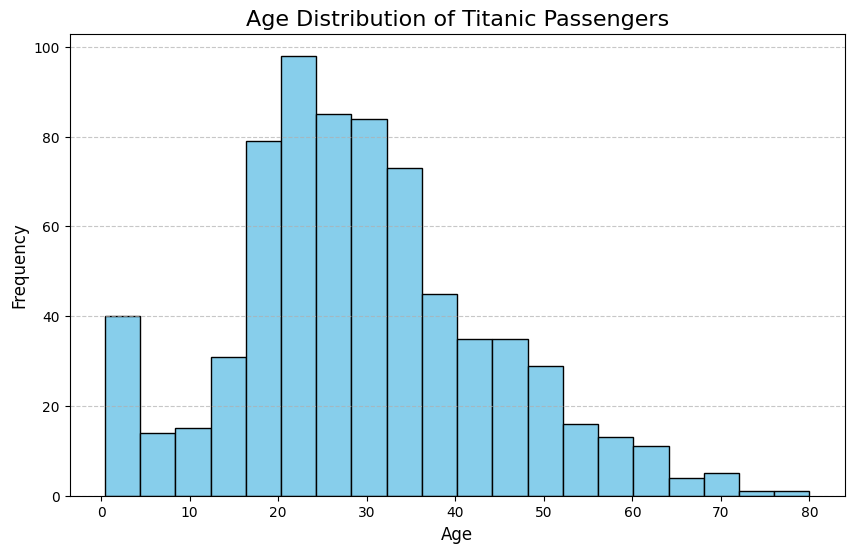

In [29]:

# Plotting the age distribution
plt.figure(figsize=(10, 6))
titanic_data['Age'].dropna().plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<details>

<summary><strong>Solution</strong> (show)</summary>

```python
age_info = titanic['Age'].isna().value_counts()
print("\nAge information availability:")
print(age_info)

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(x=titanic['Age'].isna().map({True:'Missing', False:'Available'}))
plt.title('Age Information Availability')

plt.subplot(122)
sns.histplot(data=titanic, x='Age', bins=30)
plt.title('Age Distribution')
plt.show()

</details>

```

# Question 5
***
***Show the age distribution per ticket class, per sex. What do you find?***
***

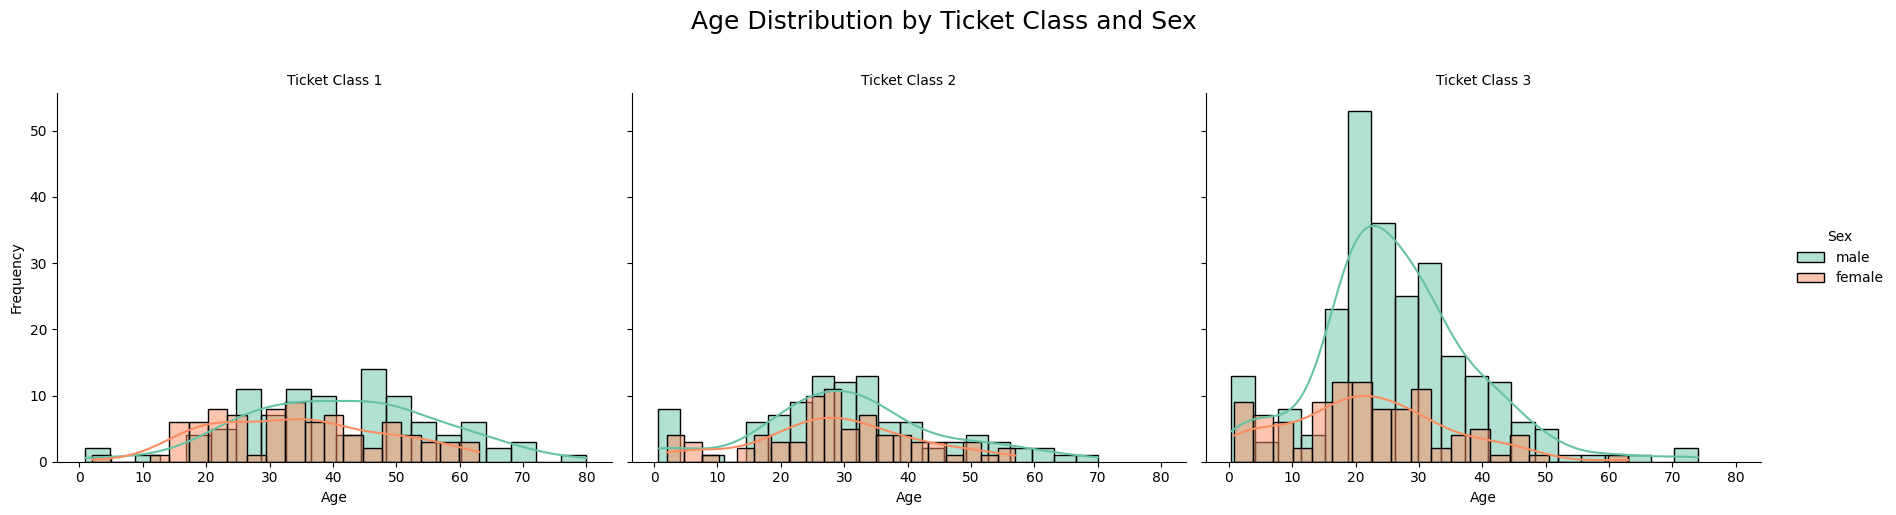

In [37]:
# Load the dataset
file_path = "C:\\Titanic\\Titanic-Dataset.csv"  # Replace with the actual file path
titanic_data = pd.read_csv(file_path)

# Drop rows where 'Age', 'Pclass', or 'Sex' are missing
filtered_data = titanic_data.dropna(subset=['Age', 'Pclass', 'Sex'])

# Filter data to exclude rows with missing values in relevant columns
filtered_data = titanic_data.dropna(subset=['Age', 'Pclass', 'Sex'])

# Create a FacetGrid for Age distribution by ticket class and sex
g = sns.FacetGrid(
    data=filtered_data,
    col="Pclass",
    hue="Sex",
    height=5,
    aspect=1.2,
    palette="Set2"
)

# Map histograms onto the grid
g.map(sns.histplot, "Age", bins=20, kde=True, edgecolor="black").add_legend()

# Add titles and adjust layout
g.fig.suptitle("Age Distribution by Ticket Class and Sex", fontsize=18, y=1.02)
g.set_axis_labels("Age", "Frequency")
g.set_titles("Ticket Class {col_name}")
g.tight_layout()
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(titanic, col='Sex', row='Pclass', height=3)
g.map(sns.histplot, 'Age')
plt.show()

# Question 6: Survival by age, sex, and class
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(titanic, col='Sex', row='Pclass', hue='Survived', height=3)
g.map(sns.histplot, 'Age')
plt.show()


</details>

```

#  Question 6
***
***How do the sex, ticket class, and age of a passenger affect their chance of survival? Try to use a single plot to answer this question.***
***

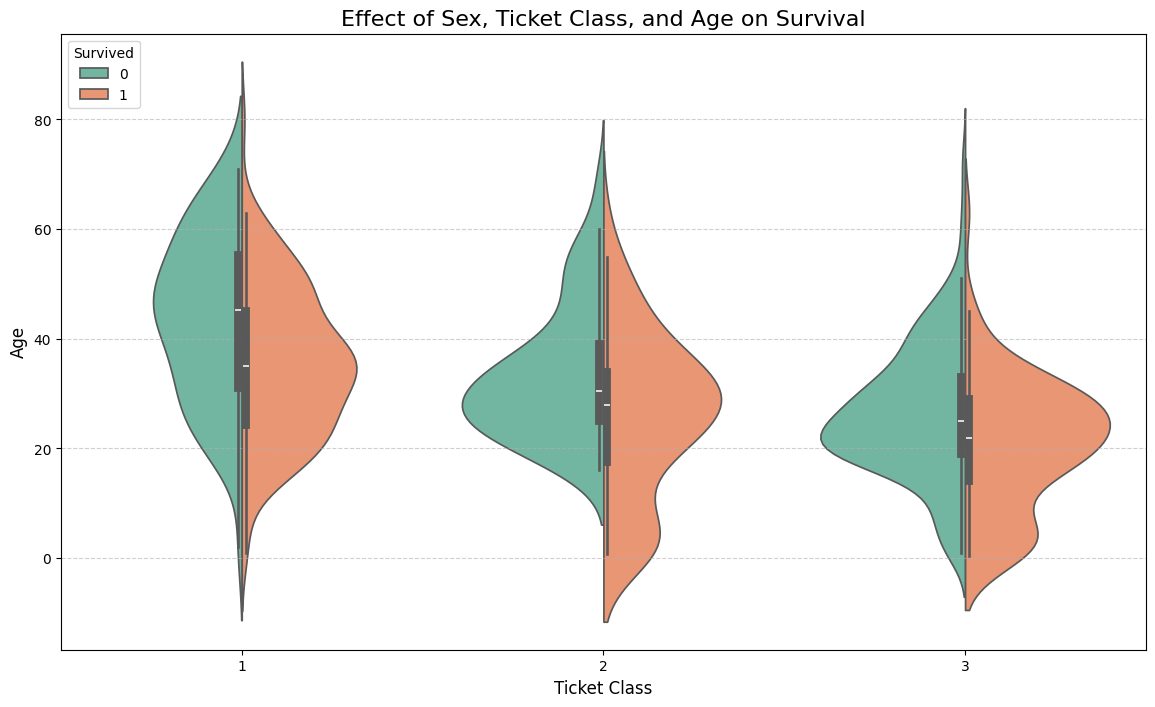

In [38]:
# Filter data to exclude rows with missing values in relevant columns
filtered_data = titanic_data.dropna(subset=['Age', 'Pclass', 'Sex', 'Survived'])

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create a violin plot
sns.violinplot(
    data=filtered_data,
    x="Pclass",
    y="Age",
    hue="Survived",
    split=True,
    palette="Set2"
)

# Customize the plot
plt.title("Effect of Sex, Ticket Class, and Age on Survival", fontsize=16)
plt.xlabel("Ticket Class", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Survived", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(titanic, col='Sex', row='Pclass', hue='Survived', height=3)
g.map(sns.histplot, 'Age')
plt.show()


</details>

```

#  Question 7
***
***Show the distribution of the number of family members (including siblings, spouses, parents, and children) that each passenger was accompanied by. Were most passengers travelling solo or with family?***
***

Passengers traveling solo: 537
Passengers traveling with family: 354


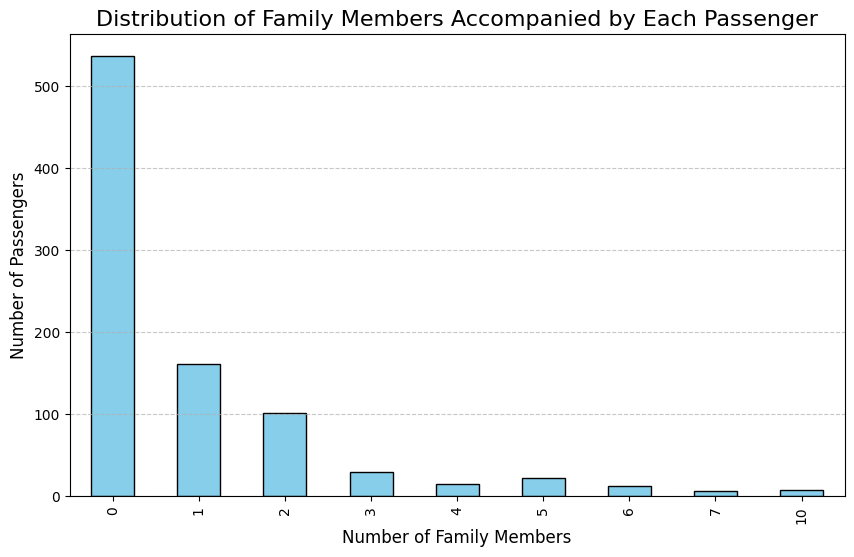

In [39]:
# Create a new column for the total number of family members
titanic_data['FamilyMembers'] = titanic_data['SibSp'] + titanic_data['Parch']

# Calculate the number of passengers traveling solo vs. with family
solo_count = (titanic_data['FamilyMembers'] == 0).sum()
family_count = (titanic_data['FamilyMembers'] > 0).sum()

# Display the counts
print(f"Passengers traveling solo: {solo_count}")
print(f"Passengers traveling with family: {family_count}")

# Plot the distribution of family members
plt.figure(figsize=(10, 6))
titanic_data['FamilyMembers'].value_counts().sort_index().plot(
    kind='bar', color='skyblue', edgecolor='black'
)

# Customize the plot
plt.title('Distribution of Family Members Accompanied by Each Passenger', fontsize=16)
plt.xlabel('Number of Family Members', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', data=titanic)
plt.title('Family Size Distribution')
plt.show()


</details>

```

#  Question 8
***
***Which ticket class did most of the largest families get? And which ticket class has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class?***
***

In [42]:
### Question 1: Ticket class for the largest families
# Identify the maximum family size
max_family_size = titanic_data['FamilyMembers'].max()

# Filter rows with the largest families
largest_families = titanic_data[titanic_data['FamilyMembers'] == max_family_size]

# Determine ticket classes for largest families
largest_family_classes = largest_families['Pclass'].value_counts()

### Question 2: Proportion of solo-traveling female passengers by class
# Identify solo-traveling female passengers (FamilyMembers == 0 and Sex == "female")
female_solo = titanic_data[(titanic_data['FamilyMembers'] == 0) & (titanic_data['Sex'] == 'female')]

# Calculate total number of females per ticket class
total_females_per_class = titanic_data[titanic_data['Sex'] == 'female']['Pclass'].value_counts()

# Calculate solo female proportion per ticket class
female_solo_proportion = female_solo['Pclass'].value_counts() / total_females_per_class

# Identify the class with the lowest proportion of solo-traveling females
lowest_solo_female_class = female_solo_proportion.idxmin()

# Output results
print(f"Largest family size: {max_family_size}")
print("Ticket classes for the largest families:")
print(largest_family_classes)
print("\nProportion of solo-traveling females by class:")
print(female_solo_proportion)
print(f"\nTicket class with the lowest proportion of solo-traveling females: {lowest_solo_female_class}")


Largest family size: 10
Ticket classes for the largest families:
Pclass
3    7
Name: count, dtype: int64

Proportion of solo-traveling females by class:
Pclass
3    0.416667
1    0.361702
2    0.421053
Name: count, dtype: float64

Ticket class with the lowest proportion of solo-traveling females: 1


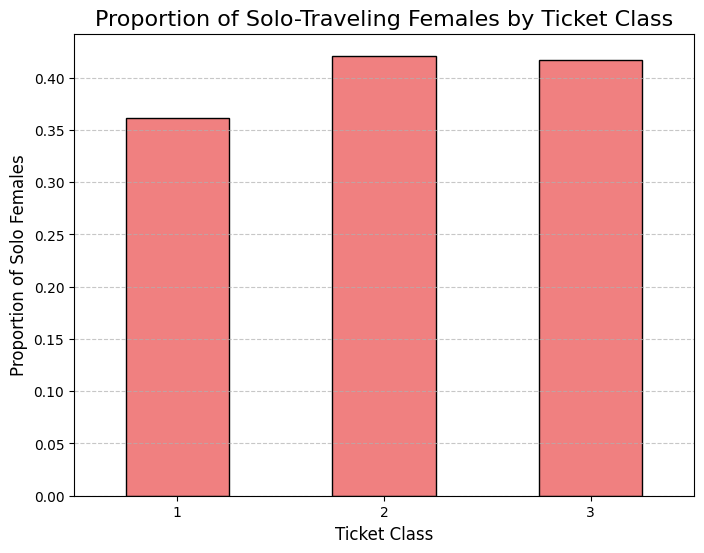

In [43]:
# Plot the proportion of solo-traveling females by ticket class
plt.figure(figsize=(8, 6))
female_solo_proportion.sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Proportion of Solo-Traveling Females by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Proportion of Solo Females', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', data=titanic, hue='Pclass')
plt.title('Family Size Distribution by Class')
plt.show()


</details>

```

#  Question 9
***
***In this dataset, the Fare variable does not represent the fare per person. Instead, each ticket number has a corresponding fare, and some passengers share one single ticket number. Therefore, the Fare variable is the total fare for a group of passengers sharing the same ticket number. Knowing this, calculate the average fare per person. You don’t need to show a table or a figure for this question, just show the code for the calculation.***
***

In [44]:
# Group data by ticket number to calculate total fare per ticket and the count of passengers sharing each ticket
ticket_groups = titanic_data.groupby('Ticket').agg(
    TotalFare=('Fare', 'first'),  # Total fare for each ticket
    PassengerCount=('Ticket', 'size')  # Count of passengers sharing the ticket
).reset_index()

# Calculate the average fare per person for each ticket group
ticket_groups['FarePerPerson'] = ticket_groups['TotalFare'] / ticket_groups['PassengerCount']

# Calculate the overall average fare per person
average_fare_per_person = ticket_groups['FarePerPerson'].mean()

# Output the result
print(f"Average fare per person: {average_fare_per_person:.2f}")


Average fare per person: 16.75


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
ticket_groups = titanic.groupby('Ticket').agg({
    'Fare': 'first',
    'PassengerId': 'count'
}).rename(columns={'PassengerId': 'GroupSize'})

ticket_groups['FarePerPerson'] = ticket_groups['Fare'] / ticket_groups['GroupSize']
average_fare = ticket_groups['FarePerPerson'].mean()
print(f"\nAverage fare per person: {average_fare:.2f}")

</details>

```

#  Question 10
***
***What is the distribution of the per-ticket fare for each ticket class?***
***

C:\Users\User\AppData\Local\Temp\ipykernel_6964\1844360554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


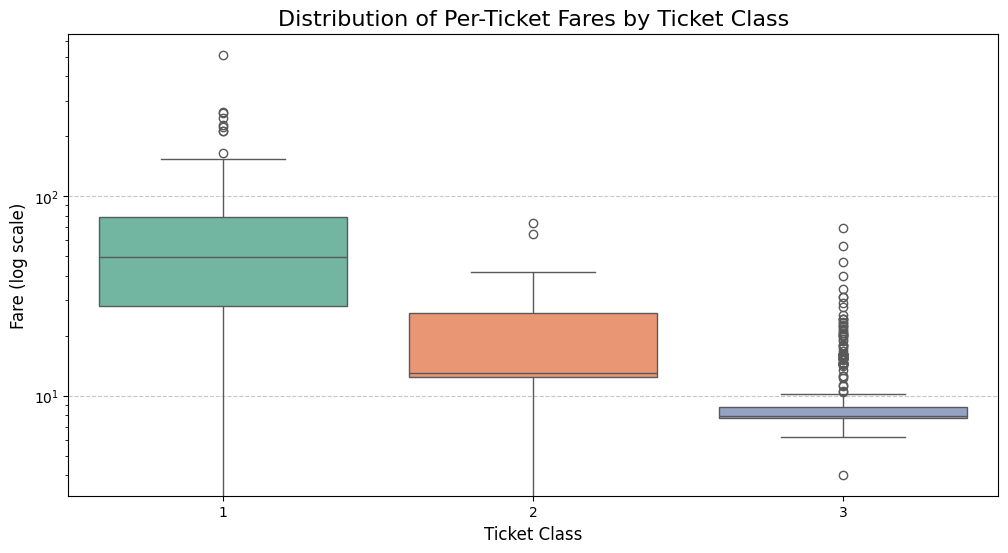

In [47]:
# Group data by ticket number to ensure unique tickets
ticket_fares = titanic_data.groupby('Ticket').agg(
    TotalFare=('Fare', 'first'),  # Total fare for each ticket
    TicketClass=('Pclass', 'first')  # Ticket class for the ticket
).reset_index()

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for the distribution of fares per ticket class
sns.boxplot(
    data=ticket_fares,
    x='TicketClass',
    y='TotalFare',
    palette='Set2'
)

# Customize the plot
plt.yscale('log')  # Use logarithmic scale for fare (to handle skewness)
plt.title('Distribution of Per-Ticket Fares by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Fare (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<details>

<summary><strong>Solution</strong> (show)</summary>

```python
plt.figure(figsize=(12, 8))
for pclass in [1, 2, 3]:
    plt.subplot(3, 1, pclass)
    class_fares = titanic[titanic['Pclass'] == pclass]['Fare']
    sns.histplot(class_fares, bins=50)
    plt.title(f'Fare Distribution - Class {pclass}')
plt.tight_layout()
plt.show()

</details>

```